Estudiante 1:

Estudiante 2:

----

# IMEC2001 Herramientas Computacionales 
## Taller Semana 8: Ecuaciones diferenciales ordinarias - ODE
### Fecha Entrega: <font color="#FF5733"> 23:59h de Marzo 19, 2023</font>

Universidad de los Andes — Febrero 8, 2023.
___

### <u>Tener en Cuenta</u>

- En la casilla anterior a esta coloque el nombre de los integrantes del grupo.
- La entrega del taller es por Bloque Neon y se envía el archivo en formato de Jupyter Notebook (extensión `.ipynb`).
- El nombre del archivo debe ser: `T3_Apellido Integrante 1_ Apellido Integrante 2` (si trabajó el parejas). `T3_Apellido` (si trabajó individual). Por ejemplo: `T3_SalazarPeña_VargasTorres` o `T3_VargasTorres`
- Comente el código con el proceso que realizó para llegar a la solución.
- A lo largo del taller se dejarán algunas casillas comentadas donde puede desarrollar el código, sin embargo, no es obligatorio que lo utilice en ese orden.

----
# Tabla de Contenido 
## Ecuaciones diferenciales ordinarias 
### Sistemas de Segundo orden  [→](#section1)
### Térmico:
- Actividad 1: Diferencias Finitas [→](#exercise1)

### Dinámico:
- Actividad 2: Comportamiento Pelota que rebota [→](#exercise2)
- Actividad 3: Oscilador de Van der Pol [→](#exercise3)


<a id="section1"></a>
## Sistemas de segundo orden 
----
Otro de los problemas comunes de ODE son los de transferencia de calor, estos están descritos por una ecuación de segundo orden (El gradó más grande de las derivadas que tiene la ecuación es 2).

$$\frac{d^2T}{dx^2} + h'(T_a-T)=0$$

Para encontrar una solución al sistema se utiliza el método de diferencias finitas. En este se sustituyen las derivadas de la ecuación $(y', \dot{y}, \frac{dy}{dt})$ con aproximaciones mediante las diferencias finitas dividas, teniendo así un sistema de ecuaciones algebraicas. La segunda derivada en diferencias finitas dividas centradas es de la siguiente forma:

$$\frac{d^2T}{dx^2}=\frac{T_{i+1}-2T_i+T_{i-1}}{\Delta x^2}$$

Esta ecuación se aplica a cada nodo o punto que se esté estudiando para conocer su temperatura. Si se asume un $\Delta x = 1$ (Espacio entre los nodos) y que no hay una afectación de factores externos (convección, radiación o conducción) la ecuación queda de la siguiente forma:

$$T_{i+1}-2T_i+T_{i-1} = 0$$


<a id="exercise1"></a>
## <font color="#276C9B"> Actividad 1  </font>

<img src='../img/Temperaturas_P1.jpg'>

Para el sistema mostrado que se quieren conocer las temperaturas en cada nodo ($T_1, T_2, T_3, T_4$). $T_{\infty_1}$ y $T_{\infty_2}$ no se toman como nodos ya que son condiciones de borde. Utilizando la aproximación de diferencias finitas resuelva para los siguientes dos casos:

Caso 1: $T_{\infty_1} = 5$ y $T_{\infty_2} = 50$ 

Caso 2: $T_{\infty_1} = 20$ y $T_{\infty_2} = 200$

Para cada uno:

1. Escriba las ecuaciones de cada uno de los nodos. 
- **BONO 1:** Puede escribir el sistema de ecuaciones una sola vez, pero debe específicar cuáles ecuaciones cambian y por qué.
- **BONO 2:** Escriba una expresión general para el sistema mostrado.
    
2. Teniendo las ecuaciones planteadas en el literal anterior resuelva el sistema.
- **Nota:** Como puede ver en las ecuaciones planteadas se tienen n incongnitas con n ecuaciones, estos sistemas se pueden resolver con las librerías y métodos vistos las semanas anteriores.
- Puede utilizar la función `np.diag()` para plantear las ecuaciones
3. En una sola gráfica muestre las temperaturas en cada punto para cada caso, debe gráficar también las condiciones de borde. Por lo que tiene una gráfica con 6 puntos, el primero y el último son los del enunciado (C1: 20, 50 | C2: 20, 200) y los otros 4 son las soluciones del sistema. 


Plantilla para modificar:


$$
\begin{bmatrix}  %Vector de Coeficientes
	0 & 0 & 0 & 0 \\
	0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 
\end{bmatrix} 
\begin{Bmatrix} %Vector de incognitas
	A \\
	B \\
    C \\
    D
\end{Bmatrix} = 
\begin{Bmatrix} %Vector de términos independentes
	0\\
    0 \\
    0 \\
    0
\end{Bmatrix} 
$$

In [ ]:
# Importar liberías 


In [ ]:
# Función para calcular la solución del sistema


In [ ]:
# Matriz de coeficientes


In [ ]:
# Nodos 

# Gráfica


### ¿Qué comportaminto observa? 

## Dinámico
-----
Como se ha visto en clase las ecuaciones diferenciales ordinarias trabajan con el cambio de **una** variable con respecto a la otra. Un ejemplo de lo anterior es la ecuación que describe el comportamiento de forma simplificada una pelota que rebota contra el piso. Se denota por $x(t)$ a la posición vertical de la pelota y con $v(t)$ la velocidad (positiva hacía arriba). Se tienen los siguientes escenarios: 

1. Cuando $x(t) > 0$ la pelota está en el aire y satisface la siguiente ecuación:

$$m\dot{v} = -b_a v - mg$$

- $m$ es la masa de la pelota
- $b_a$ es el coeficiente de rozamiento del aire
- $g$ es el valor de la gravedad


2. Cuando $x(t) < 0$ la pelota está en contacto con el piso, esta se modela como un sistema masa - resorte:

$$m\dot{v} = -kx - bv -mg$$

- $b$ es la constante de amortiguamiento del suelo
- $k$ es la constante de elasticidad del suelo

El modelo se puede plantear como un sistema lineal a trozos, calculando así tramos de la solución. Considere los siguientes parámetros:

- $b_a = 0.1$
- $m = 1$
- $b = 30$
- $g = 9.8 $
- $k =$ Los primeros 6 dígitos de su código dividido 2

Como condiciones iniciales se tienen que:

- $x(0) = 10$
- $v(0) = 0$

Ahora la pregunta es ¿Cómo se toman estos datos? y ¿Cómo veo el comportamiento de las variables de interés?

**Pasos:**
1. Definir los parámetros del caso 
2. Plantear el sistema de ecuaciones de primer orden para cada caso 

- **Caso  1:**
$$\ddot{x} = \frac{1}{m}(-b_a \dot{x} - mg)  $$ 

- **Caso  2:**
$$\ddot{x} = \frac{1}{m}(-kx - b\dot{x} -mg) $$ 
3. Especificar las condiciones iniciales.
4. Especificar el tiempo. 
4. Calcular y gráficar un tramo de la solución desde la condición inicial hasta el tiempo $t_1$ en el que se cumple que $x(t_1)=0$.
5. Utilizando como condición inicial los valores finales del tramo obtenido en el punto anterior: $x(t_1) = 0$, $v(t_1)$ se calcula un nuevo tramo de la solución hasta un instante $t_2$ en que se verifique nuevamente $x(t_2)=0$.
6. Repetir el procedimiento anterior varias vecces y gráficar la solución. 


In [1]:
# Importar librerias 
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from ipywidgets import interact

# Función formato gráfica
def formato_grafica(ax, titulo, ejex, ejey, leyenda=False, xlim=[None, None], ylim=[None, None]):
    plt.rcParams['axes.axisbelow'] = True

    ax.set_title(titulo, fontsize=15)
    ax.set_ylabel(ejey, fontsize=13)
    ax.set_xlabel(ejex, fontsize=13)

    plt.tick_params(direction='out', length=5, width=0.75, grid_alpha=0.3)
    plt.xticks(rotation=0)
    plt.minorticks_on()
    plt.ylim(ylim[0], ylim[1])
    plt.xlim(xlim[0], xlim[1])
    ax.grid(True)
    ax.grid(visible=True, which='major', color='grey', linestyle='-')
    ax.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
    
    if leyenda == True:
        plt.legend(loc='best')
    
    plt.tight_layout()


In [2]:
# Paso 1: Definición de parámetros 

m = 1             # Masa
b_a = 0.1         # Coeficiente de rozamiento del aire
b = 30            # Constante de amortiguamiento del suelo
g = 9.8           # Gravedad
k = (2011231)/2   # Constante de elasticidad del suelo

In [3]:
# Paso 2: Definir ecuación

def ecuacion_2(variables, t, m, b_a, b, g, k):
    x = variables[0]
    dx_dt = variables[1]
    
    if (x > 0):
        d2x_dt2 = (1/m)*(-b_a*dx_dt - m*g)
    else:
        d2x_dt2 = (1/m)*(-k*x - b*dx_dt - m*g)
        
    return [dx_dt, d2x_dt2]

In [4]:
# Paso 3: Condiciones iniciales
# x(0) = 10
# v(0) = 0
con_init_1 = [10, 0]  

In [5]:
# Paso 4: Paso de tiempo que se va a estudiar 
time_1 = np.linspace(0, 10, 97)  

In [6]:
# Paso 5: Solucionar ODE

sol_1 = integrate.odeint(func=ecuacion_2, 
                       y0=con_init_1, 
                       t=time_1, 
                       args=(m, b_a, b, g, k))
sol_1

array([[ 1.00000000e+01,  0.00000000e+00],
       [ 9.94701587e+00, -1.01553492e+00],
       [ 9.78879577e+00, -2.02054624e+00],
       [ 9.52643035e+00, -3.01514304e+00],
       [ 9.16099884e+00, -3.99943322e+00],
       [ 8.69356926e+00, -4.97352359e+00],
       [ 8.12519858e+00, -5.93751986e+00],
       [ 7.45693281e+00, -6.89152661e+00],
       [ 6.68980713e+00, -7.83564738e+00],
       [ 5.82484598e+00, -8.76998460e+00],
       [ 4.86306319e+00, -9.69463965e+00],
       [ 3.80546207e+00, -1.06097129e+01],
       [ 2.65303556e+00, -1.15153036e+01],
       [ 1.40676630e+00, -1.24115100e+01],
       [ 6.76267575e-02, -1.32984293e+01],
       [ 1.17053399e+00,  1.16709333e+01],
       [ 2.32696195e+00,  1.05344571e+01],
       [ 3.36562147e+00,  9.40975785e+00],
       [ 4.28773289e+00,  8.29671338e+00],
       [ 5.09450393e+00,  7.19520294e+00],
       [ 5.78712984e+00,  6.10510702e+00],
       [ 6.36679347e+00,  5.02630732e+00],
       [ 6.83466537e+00,  3.95868680e+00],
       [ 7.

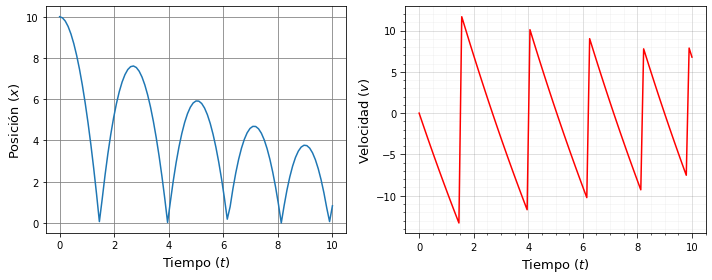

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(time_1, sol_1[:,0], label='Posición')
ax2.plot(time_1, sol_1[:,1], 'r')

formato_grafica(ax1 ,titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='Posición ($x$)',
                leyenda=False)

formato_grafica(ax2, titulo='', 
                ejex='Tiempo ($t$)', 
                ejey='Velocidad ($v$)',
                leyenda=False)

Ya teniendo este resultado, ¿Qué tal si se mira el comportamiento en el tiempo? Para esto se va a utilizar la librería `interact` de `ipywidgets`. 

In [8]:
def f_p1(t, b):

    m = 1             # Masa
    b_a = 0.1         # Coeficiente de rozamiento del aire
    g = 9.8           # Gravedad
    k = (2011231)/2   # Constante de elasticidad del suelo
    
    time = np.linspace(0, t, 97) 
    sol_1 = integrate.odeint(func=ecuacion_2, 
                        y0=con_init_1, 
                        t=time,
                        args=(m, b_a, b, g, k))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(time, sol_1[:,0], label='Posición')
    ax2.plot(time, sol_1[:,1], 'r')

    formato_grafica(ax1 ,titulo='', 
                    ejex='Tiempo ($t$)', 
                    ejey='Posición ($x$)',
                    leyenda=False)

    formato_grafica(ax2, titulo='', 
                    ejex='Tiempo ($t$)', 
                    ejey='Velocidad ($v$)',
                    leyenda=False)

In [9]:
interact(f_p1, t=(0, 15), b=(0, 30))

interactive(children=(IntSlider(value=7, description='t', max=15), IntSlider(value=15, description='b', max=30…

<function __main__.f_p1(t, b)>

<a id="exercise2"></a>
## <font color="#276C9B"> Actividad 2  </font>
<div class="alert alert-block alert-warning">
    
Interactue con cada uno de los *sliders*. Realice un análisis del comportamiento de la gráfica, concluya acerca del tiempo y de la constante de amortiaguamiento del suelo.

**Nota:** No cambie los números que se encuentran dentro de la función interact o lo que se encuentra dentro de la función f_p1.
 
</div>


<a id="exercise3"></a>
## <font color="#276C9B"> Actividad 3  </font>

Teniendo como referencia el anterior ejercicio anterior, se tiene la ecuación del oscilador de Van der Pol. Este tiene un amortiguamiento no lineal y está descrito por la siguien ecuación de segundo orden:

$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

Siendo $x$ la posición, $t$ el tiempo y $\mu$ que es el parámetro que tiene en cuenta el amortiguamiento, este depende no solo de la variable sino de de la magnitud de las oscilaciones. Esta ecuación permite modelar fenómenos y sistemas que oscinlan de manera periódica y esptable. Algunas áreas en las que se encuentra este fenómeno son:
- Eléctrica: Circuitos y temporizadores.
- Biología: Modelo eléctrico del corazón.

<div class='alert alert-block alert-info'> 
    
<i class='fa fa-info-circle' aria-hidden='true'></i>
Puede obtener más información en el siguiente [documento](https://www.academia.edu/35768562/Oscilador_de_Van_Der_Pol).
</div>

El ejercicio que debe realizar consta de los siguientes pasos: 

## Paso 1
<div class="alert alert-block alert-warning">
Plantee el sistema de ecuaciones de primer orden, edite la plantilla que se encuentra a continuación dando doble clic sobre la casilla.
</div>

$$\frac{d^2x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

## Paso 2
<div class="alert alert-block alert-warning">
Cree una variable con el parámetro que afecta la ecuación. 
</div>

In [ ]:
# Paso 2: Definición de variables 


## Paso 3

<div class="alert alert-block alert-warning">
Defina la ecuuación que se quiere resolver. 
</div>

In [ ]:
# Paso 3: Definir ecuación


## Paso 4

<div class="alert alert-block alert-warning">
Especifique las siguientes condiciones iniciales:
    
- $x(0) = 1$
- $x'(0) = 0$
</div>

In [ ]:
# Paso 4: Condiciones iniciales


## Paso 5

<div class="alert alert-block alert-warning">
Especifique el tiempo en el que se va a estudiar la respuesta entre un rango de 0 a 40. 
</div>

In [ ]:
# Paso 5. Puntos de tiempo


## Paso 6

<div class="alert alert-block alert-warning">
Solucione el sistema ODE. 
</div>

In [ ]:
## Paso 6: Solucionar ODE


## Paso 7

En esta debe contruir una gráfica que tenga una fila y 3 columnas que se encuentren organizadas de la siguiente forma:
    
    - Columna 1: x vs t
    - Columna 2: y vs t
    - Columna 3: y vs x

Para que la gráfica sea interactiva como en el anterior punto debe pasar como parámetros la función $\mu$ y la condición inicial como se muestra a continuacion:
 ``` Python    
    def f(mu, x0):
 ```
 
Dentro de esta función se deben realizar las gráficas y la función para resolver la ecuación de segundo orden. Finalmente, para poder interactuar con ella debe agregar en una casilla diferente y debajo de la que declaró la función la siguiente línea:

 ``` Python
interact(f, mu=(0, 10), x0=1)
 ```

In [ ]:
# Paso 7: Función para la gráfica


In [ ]:
# Paso 7: Línea para visualizar


1. Seleccione 3 configuraciones de $\mu$ para una condición inicial, describa qué ve en cada una de las gráficas. 
2. ¿Qué sucede cuando $\mu$ se vuelve negativo? 